### Scraping gta 5 reviews from ign and performing sentiment analysis

In [1]:
from bs4 import BeautifulSoup  
from urllib.request import urlopen as uReq
import pandas as pd
import requests

#### web scarping

In [2]:
my_url = 'https://www.ign.com/games/grand-theft-auto-v/user-reviews'

# Headers to mimic a real browser
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

response = requests.get(my_url, headers=headers)
page_html = response.text

# html content
page_soup = BeautifulSoup(page_html, "html.parser")

#### creating list of reviews

In [3]:
review_html = page_soup.find_all('div',{'class':'interface jsx-1389921904 small'}) 
reviews=[]
for i in review_html:
    a=i.text.strip()
    reviews.append(a)

#### storing in csv file

In [4]:
df = pd.DataFrame({'Review':reviews})
df

,Review
0,this game is an absolute masterpiece. it is ab...
1,"Played this game on my 360, then on my One, no..."
2,These games always start so fun. But then I ge...
3,PERFECT!
4,Gta SA ainda é muito superior. GtaV não tem hi...
5,Highly entertaining story mode with great char...
6,"Cadê GTA 6, Rockstar???"
7,"The game is good and long, but it's cheeky tha..."
8,Meu pai não deixou eu jogar
9,Le mode histoire ne m'as jamais attiré plus qu...


#### translating text

In [5]:
!pip install deep_translator -q

In [6]:
from deep_translator import GoogleTranslator
trans = GoogleTranslator(source='auto', target='english')

In [7]:
t_rev=[]
for rev in df['Review']:
    rev=trans.translate(rev)
    t_rev.append(rev)
df['Review']=t_rev 

### sentiment analysis

#### vader
a rule-based sentiment analysis tool that is specifically designed for analyzing social media texts. Vader is a pre-trained sentiment analysis model that provides a sentiment score for a given text.

In [8]:
!pip install nltk -q

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vasudharajesh.i\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#### putting score next to reviews

In [11]:
score=[]
for text in df['Review']:
    scores = analyzer.polarity_scores(text)
    comp_score=scores['compound']
    score.append(comp_score)
df['Score']=score

In [12]:
df.to_csv('Reviews.csv', index=False, encoding='utf-8')
df

,Review,Score
0,this game is an absolute masterpiece. it is ab...,0.7964
1,"Played this game on my 360, then on my One, no...",0.9686
2,These games always start so fun. But then I ge...,-0.1228
3,PERFECT!,0.6114
4,Gta SA is still far superior. GtaV has no stor...,-0.5589
5,Highly entertaining story mode with great char...,0.3345
6,"Where's GTA 6, Rockstar???",0.0000
7,"The game is good and long, but it's cheeky tha...",-0.8247
8,My dad didn't let me play,-0.2584
9,The story mode never appealed to me that much....,0.0000


<Axes: xlabel='Score', ylabel='Count'>

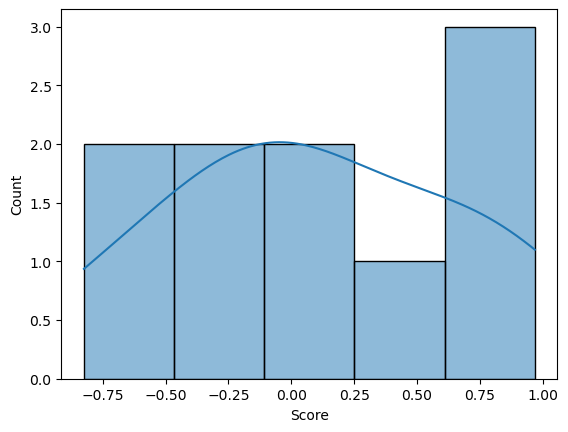

In [24]:
import seaborn as sns
sns.histplot(df['Score'],kde=True)